## Importing Library

In [24]:
#General Libraries
import numpy as np
import pandas as pd 

# Machine Learning Libraries
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

# Data Visualiztion Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterw## Importing Libraryarnings('ignore')

%matplotlib inline 



## Load Data set & Split data

In [25]:
from sklearn.datasets import load_breast_cancer
data = load_breast## Importing Library_cancer()
malignant = data.data[data.target == 0]
benign = data.data[data.target == 1]
# X = data.data
# y = data.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state =42)

## Standard Scaler 

In [27]:
scaler = StandardScaler()
scaler.fit(X_## Importing Librarytrain)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

In [28]:
## Importing Libraryfrom sklearn.decomposition import PCA 

pca = PCA(n_components=2) #양성 음성

In [41]:
X_train_pca  = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

In [43]:
print("원 데이터 형태 : {}".format(str(X_train.shape)))
print("PCA 이후 차원 축소된 데이터 형태 : {}".format(str(X_train_pca.shape)))

원 데이터 형태 : (426, 30)
PCA 이후 차원 축소된 데이터 형태 : (426, 2)


In [31]:

pca_columns = ['pca_comp1', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_train_pca,columns=pca_columns)
X_tn_pca_df['target'] = y_train

print('# Data after PCA: ')
print(X_tn_pca_df.head(8))

# Data after PCA: 
     pca_comp1   pca_comp2  target
0  -327.261255   38.048845       1
1   -76.544074  -68.085907       0
2  -283.353055   22.343584       1
3   651.683731  -19.755420       0
4  1004.192157  128.383970       0
5   112.822407   -5.494720       0
6  -179.011246   29.551160       1
7   162.920785  -33.611786       0


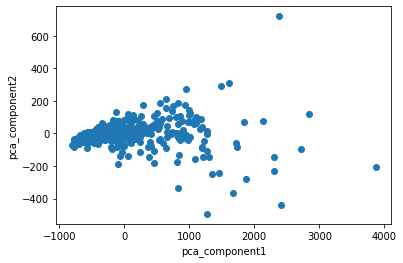

# Data without labels is visualized.


In [32]:
import matplotlib.pyplot as plt
plt.scatter(X_tn_pca_df['pca_comp1'], X_tn_pca_df['pca_comp2'], marker='o')
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

print('# Data without labels is visualized.')
%matplotlib inline 

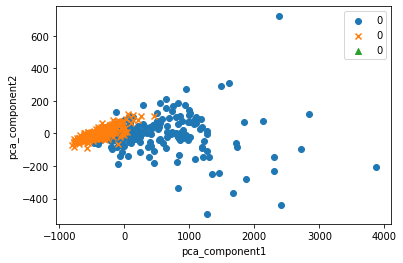

# Data with labels is visualized.


In [33]:
df = X_tn_pca_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    df_i = df[df['target']== i]
    target_i = data.target[i]
    X1 = df_i['pca_comp1']
    X2 = df_i['pca_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

print('# Data with labels is visualized.')


## Kernel PCA

In [42]:
from sklearn.decomposition import KernelPCA
## Importing Library
k_pca = KernelPCA(n_components=2, kernel='poly')
k_pca.fit(X_train_scaled)
X_train_kpca = k_pca.transform(X_train_scaled)
X_test_kpca = k_pca.transform(X_test_scaled)

In [45]:
print("원 데이터 형태 : {}".format(str(X_train_scaled.shape)))
print("PCA 이후 차원 축소된 데이터 형태 : {}".format(str(X_train_kpca.shape)))

원 데이터 형태 : (426, 30)
PCA 이후 차원 축소된 데이터 형태 : (426, 2)


In [47]:
import pandas as pd
kpca_columns = ['kpca_comp1', 'kpca_comp2']
X_train_kpca_df = pd.DataFrame(X_train_kpca,
                            columns=kpca_columns)
X_train_kpca_df['target'] = y_train
print('# Data after PCA: ')
print(X_train_kpca_df.head(8))




# Data after PCA: 
   kpca_comp1  kpca_comp2  target
0   -0.688768   -0.401084       1
1   -0.523396   -0.115088       0
2   -0.641571   -0.333241       1
3   -0.253269   -0.294465       0
4    1.425807   -0.241155       0
5   -0.616197   -0.337313       0
6   -0.663260   -0.385314       1
7   -0.610018   -0.350602       0


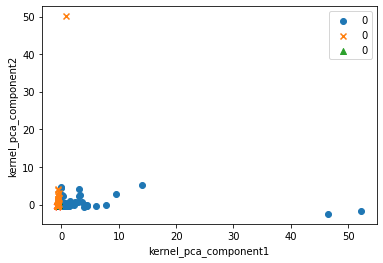

In [50]:
import matplotlib.pyplot as plt
df = X_train_kpca_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    X_i = df[df['target']== i]
    target_i = data.target[i]
    X1 = X_i['kpca_comp1']
    X2 = X_i['kpca_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
plt.xlabel('kernel_pca_component1')
plt.ylabel('kernel_pca_component2')
plt.legend()
plt.show()


# 

## Comparison

In [34]:
#Define model 
def Model## Importing Library(model):
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,X_test,y_test)
    metrics.plot_roc_curve(model, X_test, y_test)  

In [35]:
#Define model 
def Model_PCA(model):
    model.fit(X_train_pca,y_train)
    score = model.score(X_test_pca, y_test)
    model_train_score = model.score(X_train_pca, y_train)
    model_test_score = model.score(X_test_pca, y_test)
    prediction = model.predict(X_test_pca)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,X_test_pca,y_test)
    metrics.plot_roc_curve(model, X_test_pca, y_test)  

In [51]:
#Define model 
def Model_KPCA(model):
    model.fit(X_train_kpca,y_train)
    score = model.score(X_test_kpca, y_test)
    model_train_score = model.score(X_train_kpca, y_train)
    model_test_score = model.score(X_test_kpca, y_test)
    prediction = model.predict(X_test_kpca)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,X_test_kpca,y_test)
    metrics.plot_roc_curve(model, X_test_kpca, y_test) 

## Naive

Testing Score 
 0.965034965034965


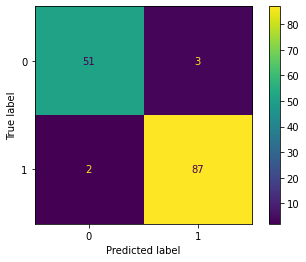

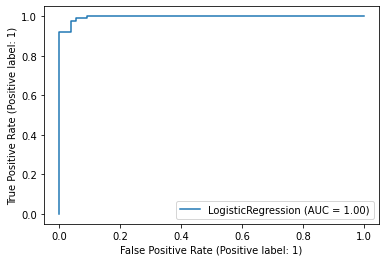

In [53]:

## Importing Library
#Logistic Regression
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
Model(lr_model)

## PCA

Testing Score 
 0.8461538461538461


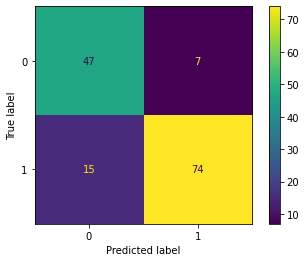

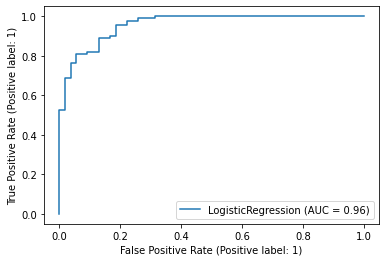

In [38]:
#Logistic Regression
lr = LogisticRegression()
lr_model = lr.fit(X_train_pca, y_train)
Model_PCA(lr_model)

## Kernel PCA

Testing Score 
 0.9020979020979021


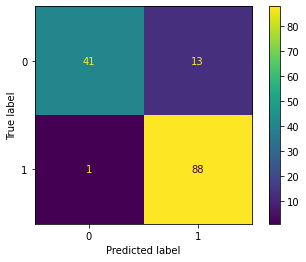

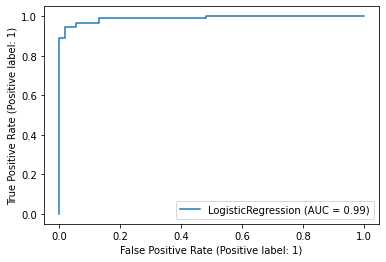

In [52]:
#Logistic Regression
lr = LogisticRegression()
lr_model = lr.fit(X_train_kpca, y_train)
Model_KPCA(l## Importing Libraryr_model)